# Load and Plot EMNIST Letters Data

Michael Madden, Feb 2026. 

This loads a file callsed emnist_letters_train.npz" with letters data, already transposed and scaled.

Note that the images as displayed are quite fuzzy looking, because they are low res (28x28).

The labels from 1 to 26, where 1=A and 26=Z. Cases include mix of uppercase and lowercase with the same label.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load("emnist_letters_85800.npz")

x_data = data["x"]
y_data = data["y"]

In [3]:
# Do some data checks ...

# Check how many different classes we have: should be 26
n_classes =len(np.unique(y_data))
print(f"The number of unique classes is {n_classes} (should be 26).")

# check that images are scaled: min should be 0, max should be 1
img = x_data[0]
print(f"\nFor a single image, the min value is {img.min()} and the max is {img.max()} (should be 0.0 and 1.0).")

# Check the shape of the two classes
print(f"\nShape of x_data is {x_data.shape}, shape of y_data is {y_data.shape} (should have 85,800 cases and x should be 28x28).")

The number of unique classes is 26 (should be 26).

For a single image, the min value is 0.0 and the max is 1.0 (should be 0.0 and 1.0).

Shape of x_data is (85800, 28, 28, 1), shape of y_data is (85800,) (should have 85,800 cases and x should be 28x28).


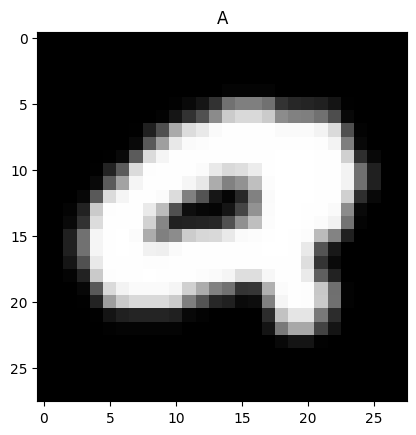

In [4]:
# Plot the first image

plt.imshow(x_data[0].squeeze(), cmap="gray")
plt.title(chr(int(y_data[0]) + 64))  
plt.show()

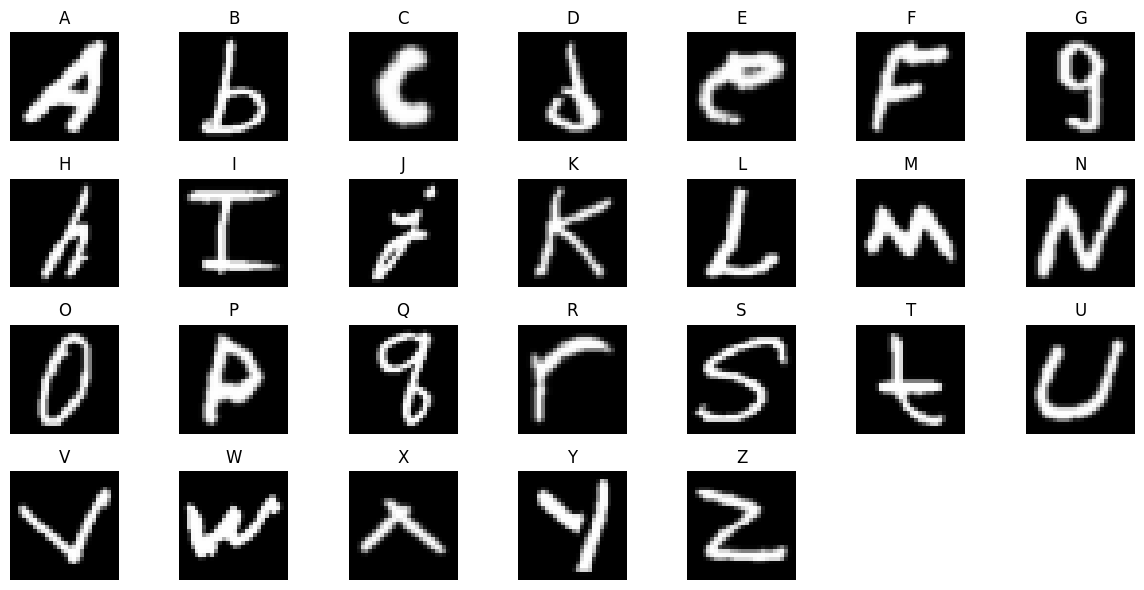

In [5]:
# Plot one item per class
n = 1000  # plot the n-th item, starting from 0

# Get unique labels
classes = np.unique(y_data)

plt.figure(figsize=(12, 6))

for i, cls in enumerate(classes):
    # Find first index of this class
    idx = np.where(y_data == cls)[0][n]
    
    plt.subplot(4, 7, i + 1)
    plt.imshow(x_data[idx].squeeze(), cmap="gray")
    plt.title(chr(int(cls) + 64))  # 1->A, 2->B, ...
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
# Extract just two classes from the dataset

# PUT YOUR OWN CLASS NUMBERS HERE: remember that A=1, z=26.
c1 = 2   # example
c2 = 25  # example

mask = (y_data == c1) | (y_data == c2)

x_binary = x_data[mask]
y_binary = y_data[mask]

# Now change labels to 0 and 1
y_binary = (y_binary == c2).astype(int)

In [7]:
# To help you examine your data, here is a graph to plot 48  images in a grid, starting from an index you specify.

def plot_grid(x, y, n):
    plt.figure(figsize=(12, 10))
    
    for i in range(48):
        idx = n + i
        
        plt.subplot(6, 8, i + 1)
        plt.imshow(x[idx].squeeze(), cmap="gray")
        plt.title(int(y[idx]))
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

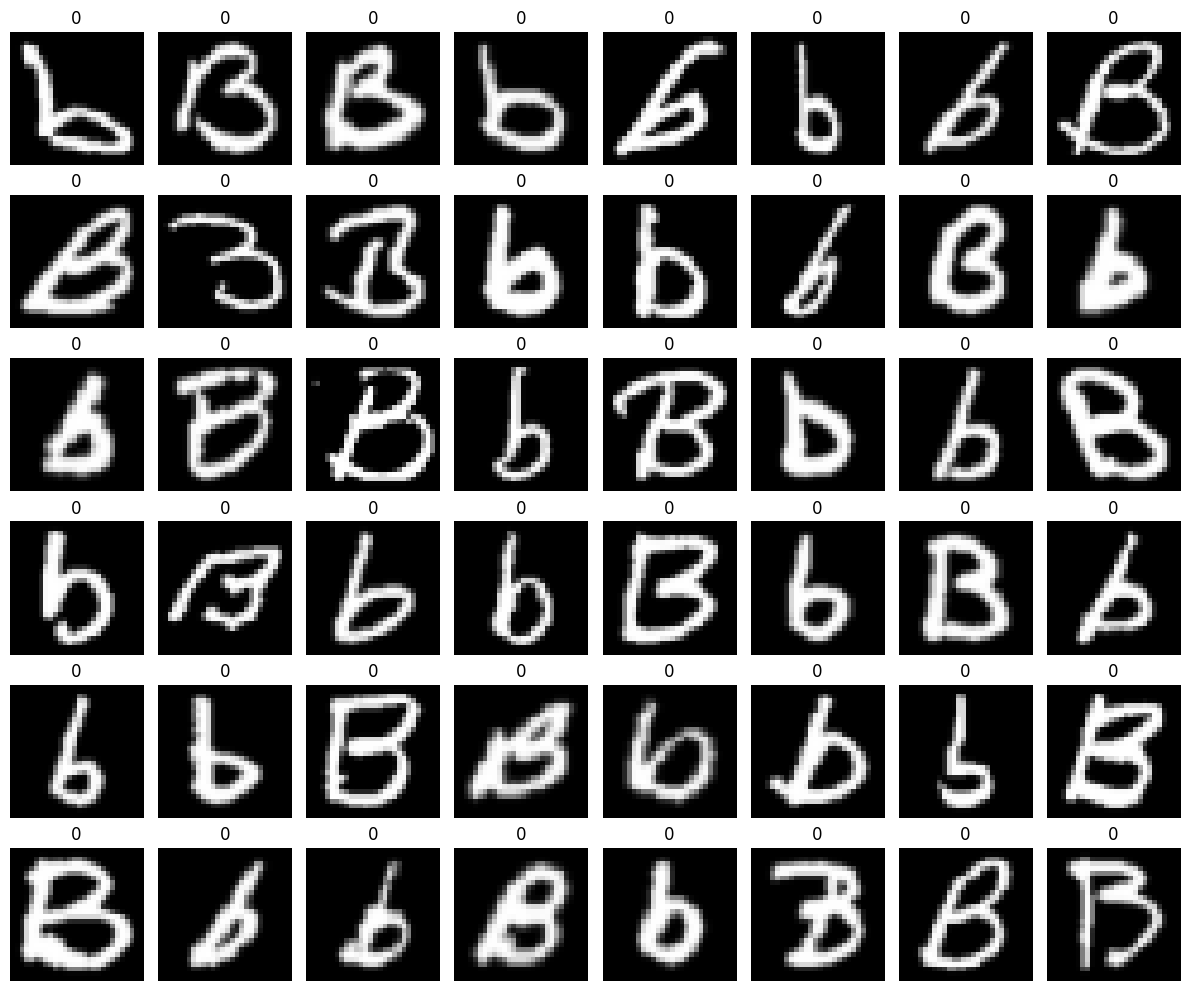

In [8]:
# Let's check images at the start - will all have label 0

plot_grid(x_binary, y_binary, n=0)

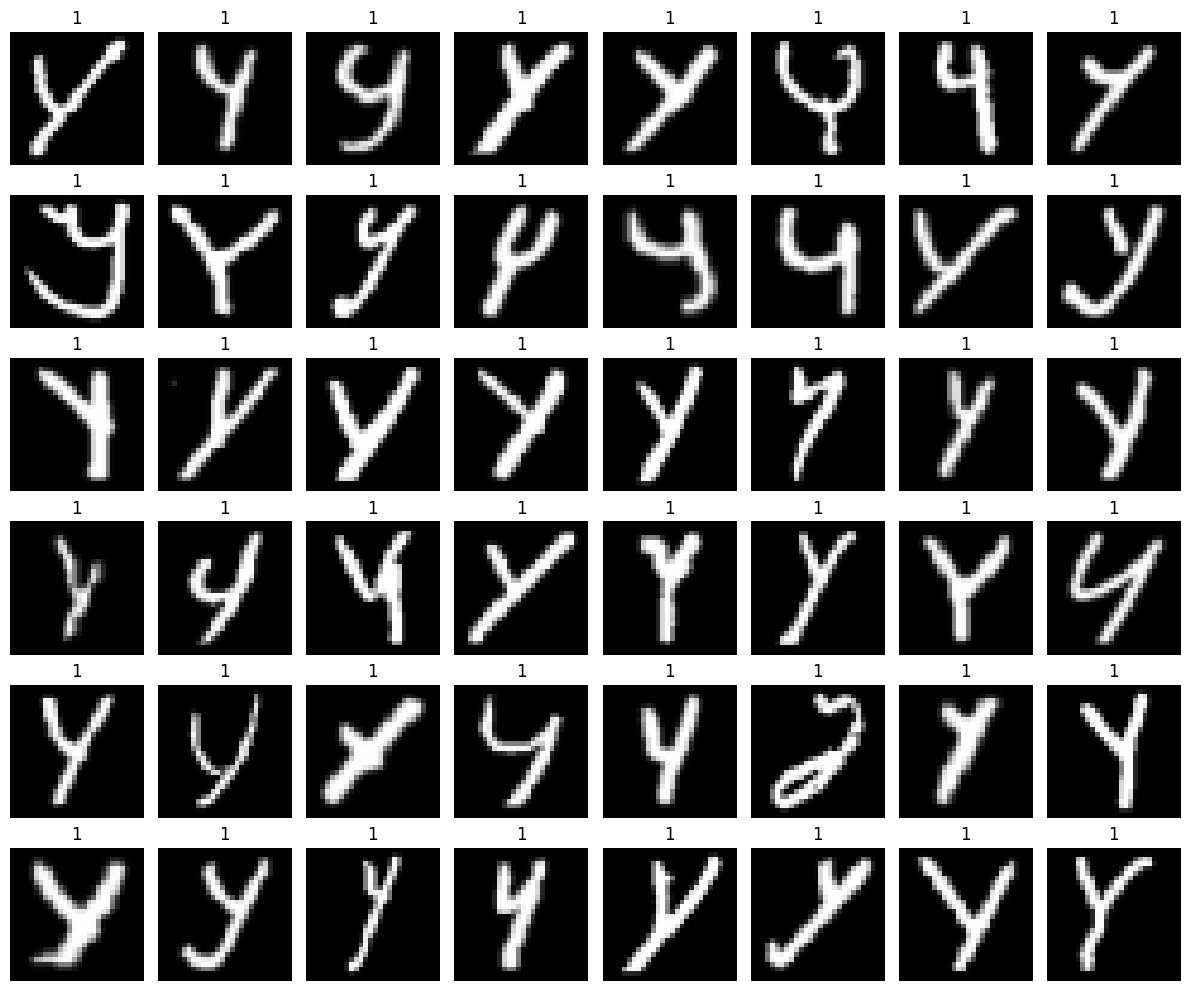

In [9]:
# Now check images after 3300 - will all have label 1

plot_grid(x_binary, y_binary, n=3300)